#**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

#**Load The Data**

In [ ]:
df = pd.read_csv('/content/intern_dataset.csv')
print(len(df))
df.tail()

912000


,Time,Signal1,Signal2,Label
911995,2020-01-04 10:55:49.186,34673.811155,0.151395,C
911996,2020-01-04 10:55:49.196,34672.951723,0.151385,C
911997,2020-01-04 10:55:49.206,34671.967555,0.151373,C
911998,2020-01-04 10:55:49.216,34670.877944,0.151359,C
911999,2020-01-04 10:55:49.226,34669.694865,0.151342,C


In [ ]:
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [ ]:
df.shape

(912000, 4)

In [ ]:
df['Label'].unique()

array(['A', 'C', 'B'], dtype=object)

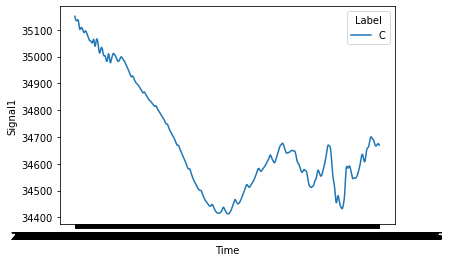

In [ ]:
sns.lineplot(data = df[910000:912000], x = 'Time', y = 'Signal1', hue = 'Label')

#**Calculation Detrended Fluctuation Analysis**

In [ ]:
def calc_rms(x, scale):
    """
    Root Mean Square (RMS) with linear detrending.
    
    Args:
  
      *x* : numpy.array
        one dimensional vector
      *scale* : int
        length of the window in which RMS will be calculaed
    Returns:
   
      *rms* : numpy.array
        RMS data in each window with length len(x)//scale
    """
    # making an array with data divided in windows

    shape = (x.shape[0]//scale, scale)

    X = np.lib.stride_tricks.as_strided(x,shape=shape)
    
    # vector of x-axis points to regression

    scale_ax = np.arange(scale)
    rms = np.zeros(X.shape[0])
    for e, xcut in enumerate(X):
        coeff = np.polyfit(scale_ax, xcut, 1)
        xfit = np.polyval(coeff, scale_ax)


        # detrending and computing RMS of each window
        rms[e] = np.sqrt(np.mean((xcut-xfit)**2))
    return rms

def dfa(x, scale_lim=[7,12], scale_dens=0.125, show=False):
    """
    Detrended Fluctuation Analysis - measures power law scaling coefficient
    of the given signal *x*.
    More details about the algorithm you can find e.g. here:
    Hardstone, R. et al. Detrended fluctuation analysis: A scale-free 
    view on neuronal oscillations
    Args:
    -----
      *x* : numpy.array
        one dimensional data vector
      *scale_lim* = [5,9] : list of length 2 
        boundaries of the scale, where scale means windows among which RMS
        is calculated. Numbers from list are exponents of 2 to the power
        of X, eg. [5,9] is in fact [2**5, 2**9].
        You can think of it that if your signal is sampled with F_s = 128 Hz,
        then the lowest considered scale would be 2**5/128 = 32/128 = 0.25,
        so 250 ms.
      *scale_dens* = 0.25 : float
        density of scale divisions, eg. for 0.25 we get 2**[5, 5.25, 5.5, ... ] 
      *show* = False
        if True it shows matplotlib log-log plot.
    Returns:
    --------
      *scales* : numpy.array
        vector of scales (x axis)
      *fluct* : numpy.array
        fluctuation function values (y axis)
      *alpha* : float
        estimation of DFA exponent
    """
    # cumulative sum of data with substracted offset
    y = np.cumsum(x - np.mean(x))
    scales = (2**np.arange(scale_lim[0], scale_lim[1], scale_dens)).astype(np.int)
    fluct = np.zeros(len(scales))

    # computing RMS for each window
    for e, sc in enumerate(scales):
        fluct[e] = np.sqrt(np.mean(calc_rms(y, sc)**2))

    # fitting a line to rms data
    coeff = np.polyfit(np.log2(scales), np.log2(fluct), 1)
    if show:
        fluctfit = 2**np.polyval(coeff,np.log2(scales))
        plt.loglog(scales, fluct, 'bo')
        plt.loglog(scales, fluctfit, 'r', label=r'$\alpha$ = %0.2f'%coeff[0])
        plt.title('DFA')
        plt.xlabel(r'$\log_{10}$(time window)')
        plt.ylabel(r'$\log_{10}$<F(t)>')
        plt.legend()
        plt.show()
        print(coeff)
    return scales, fluct, coeff[0]

#**Separating the data**

In [ ]:
# code below to separate the data 
df_A = df[df['Label'] == 'A']
print(len(df_A))
df_B = df[df['Label'] == 'B']
print(len(df_B))
df_C = df[df['Label'] == 'C']
print(len(df_C))

318000
312000
282000


##**Calculated Hurst Exponent**

Data suggests that 31800 sec which is roughly 8.8 hours, and a lot of articles suggested that DFA should be done for data which ten minutens of value and tried to calculating hurst component with different scales and it changes depending on the value of the scales array which is used to detrend the data.

##**Label A**

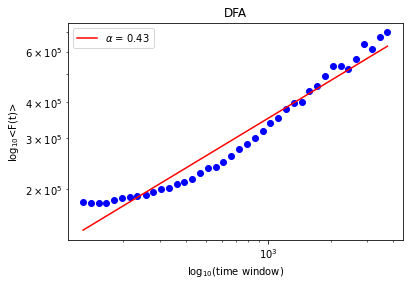

[ 0.43435589 14.09865339]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[179970.61864493 179575.66372176 178918.41859405 179779.55871306
 183320.00275437 187112.19003281 188235.160696   189956.82871642
 190606.06094971 195630.62514828 200434.79788881 202760.62813164
 208247.21291975 212628.38549078 216821.12925732 226961.71729103
 237267.47372427 239307.35775281 249216.94301663 260161.44224165
 276188.4408097  286696.39960865 300573.47205157 319577.57634583
 339152.85162434 354042.80923073 379494.55786132 398478.92198849
 401066.36244869 437273.33450585 456856.78401401 492296.12251828
 533913.97471995 533786.07266654 523803.88219561 565409.81379849
 637158.4075579  613475.07809862 673479.00799559 698914.53735544]
DFA exponent: 0.43435588648432505


In [ ]:
# Performing DFA for Signal-1 in label A
series_A = np.array(df_A['Signal1'])
scales, fluct, alpha = dfa(series_A, show=1)
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

The hurst component is more than 0.5

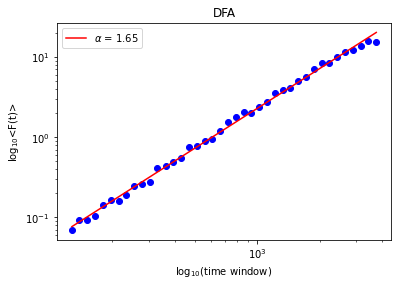

[  1.6496556  -15.25487527]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[ 0.06920572  0.09363789  0.09382781  0.10477507  0.14319098  0.16382336
  0.15775007  0.18816034  0.2426176   0.25908701  0.27556796  0.40711476
  0.43961958  0.48996303  0.54561435  0.75488882  0.77300227  0.88825344
  0.9574906   1.18670458  1.53553434  1.79148859  2.0273061   2.01703136
  2.34696494  2.74843235  3.51898024  3.89899389  4.03769052  4.99797272
  5.6189012   6.99927603  8.46580972  8.40044748 10.03011467 11.49641578
 12.17829342 13.71902012 15.73644641 15.32945339]
DFA exponent: 1.6496555975291392


In [ ]:
# Performing DFA for Signal-2 in label A
series_A = np.array(df['Signal2'])
scales, fluct, alpha = dfa(series_A, show=True)
# 12000 values suggest 20 minutes of data.
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

##**Label B**

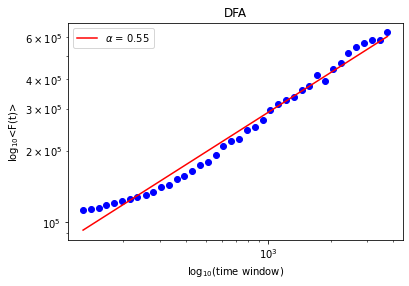

[ 0.55493507 12.61682739]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[112852.07995634 113759.2803457  115450.67481785 117987.37301746
 120214.25372151 122868.8708788  125433.63678692 127232.2653784
 130135.01484378 134659.59636228 140229.44594286 144050.62335219
 152238.21269983 157305.00130159 163797.57044686 173543.30026958
 178698.51235229 191547.14656691 209534.82097586 218870.05942166
 225109.49119774 245007.65405293 251399.78036877 269977.35860314
 295948.49425209 316012.31945639 326801.23050803 337020.35464487
 359842.21355768 374605.86401171 418191.69956271 394957.61475689
 441014.14708867 468898.9699563  513597.93313441 546207.51389547
 565165.85202303 587135.42157878 582839.97925791 629006.00035126]
DFA exponent: 0.5549350688857244


In [ ]:
# DFA for signal 1 label B
series_B = np.array(df_B['Signal1'])
scales, fluct, alpha = dfa(series_B, show=1)
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

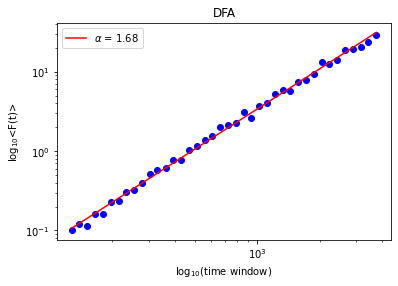

[  1.67943204 -14.98150164]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[ 0.10099712  0.12104013  0.11392022  0.16128753  0.16004023  0.22789328
  0.23530853  0.30326049  0.32620171  0.40124494  0.51484008  0.57248858
  0.6170788   0.77323059  0.77779807  1.01744823  1.14724001  1.37326871
  1.52747527  2.01586318  2.12912817  2.26237624  3.13383903  2.58395131
  3.73906808  4.03225337  5.2379581   5.94265744  5.71337387  7.35068226
  7.83883496  9.41756622 13.07585167 12.62503465 13.88978547 18.69317756
 19.40404597 20.41806549 23.54340924 28.54322204]
DFA exponent: 1.6794320436131578


In [ ]:
# DFA for label B signal 2
series_B = np.array(df_B['Signal2'])
scales, fluct, alpha = dfa(series_B, show=1)
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

##**Label C**

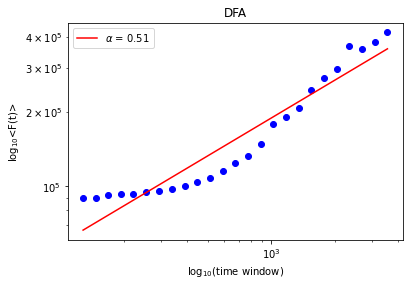

[ 0.50532547 12.48630294]
[ 128  147  168  194  222  256  294  337  388  445  512  588  675  776
  891 1024 1176 1351 1552 1782 2048 2352 2702 3104 3565]
[ 89786.43006702  89759.96735486  91963.94034232  93246.29250362
  93154.80357433  94779.14994651  95317.18404986  97852.05719801
 100396.81179798 104218.13126614 107929.01015689 115386.77678542
 124593.71703769 132677.90064745 148413.76534178 177437.69072324
 189283.66427331 207532.64414275 243587.82330001 272887.93655867
 295396.59656756 366043.86329536 356108.56542289 381857.75070487
 416481.61871772]
DFA exponent: 0.5053254725406224


In [ ]:
# DFA for signal C
series_C = np.array(df_C['Signal1'])
scales, fluct, alpha = dfa(series_C, scale_dens=0.2 ,show=1)
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

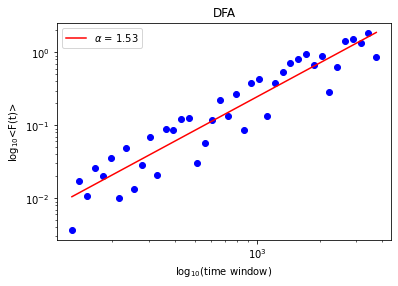

[  1.5345393  -17.31509579]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[0.00365648 0.01713365 0.01087562 0.02609452 0.02044232 0.03517965
 0.0099679  0.04931901 0.01326164 0.02891575 0.06934582 0.02112624
 0.08782635 0.08637113 0.12039242 0.12666996 0.03001576 0.05787409
 0.11742222 0.22079841 0.13447679 0.26469191 0.08714993 0.38020952
 0.43243645 0.13550867 0.38283173 0.53882108 0.71261468 0.80533525
 0.95864921 0.67619305 0.87961929 0.28505953 0.63973128 1.44657774
 1.53614206 1.3278582  1.82175812 0.87085098]
DFA exponent: 1.5345393007082222


In [ ]:
# Label C, Signal 2
series_C = np.array(df_C['Signal2'])
scales, fluct, alpha = dfa(series_C, show=1)
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

The hurst component of the data is more than 0.5

##**Plot Of Label A,B and C (Signal 1)**

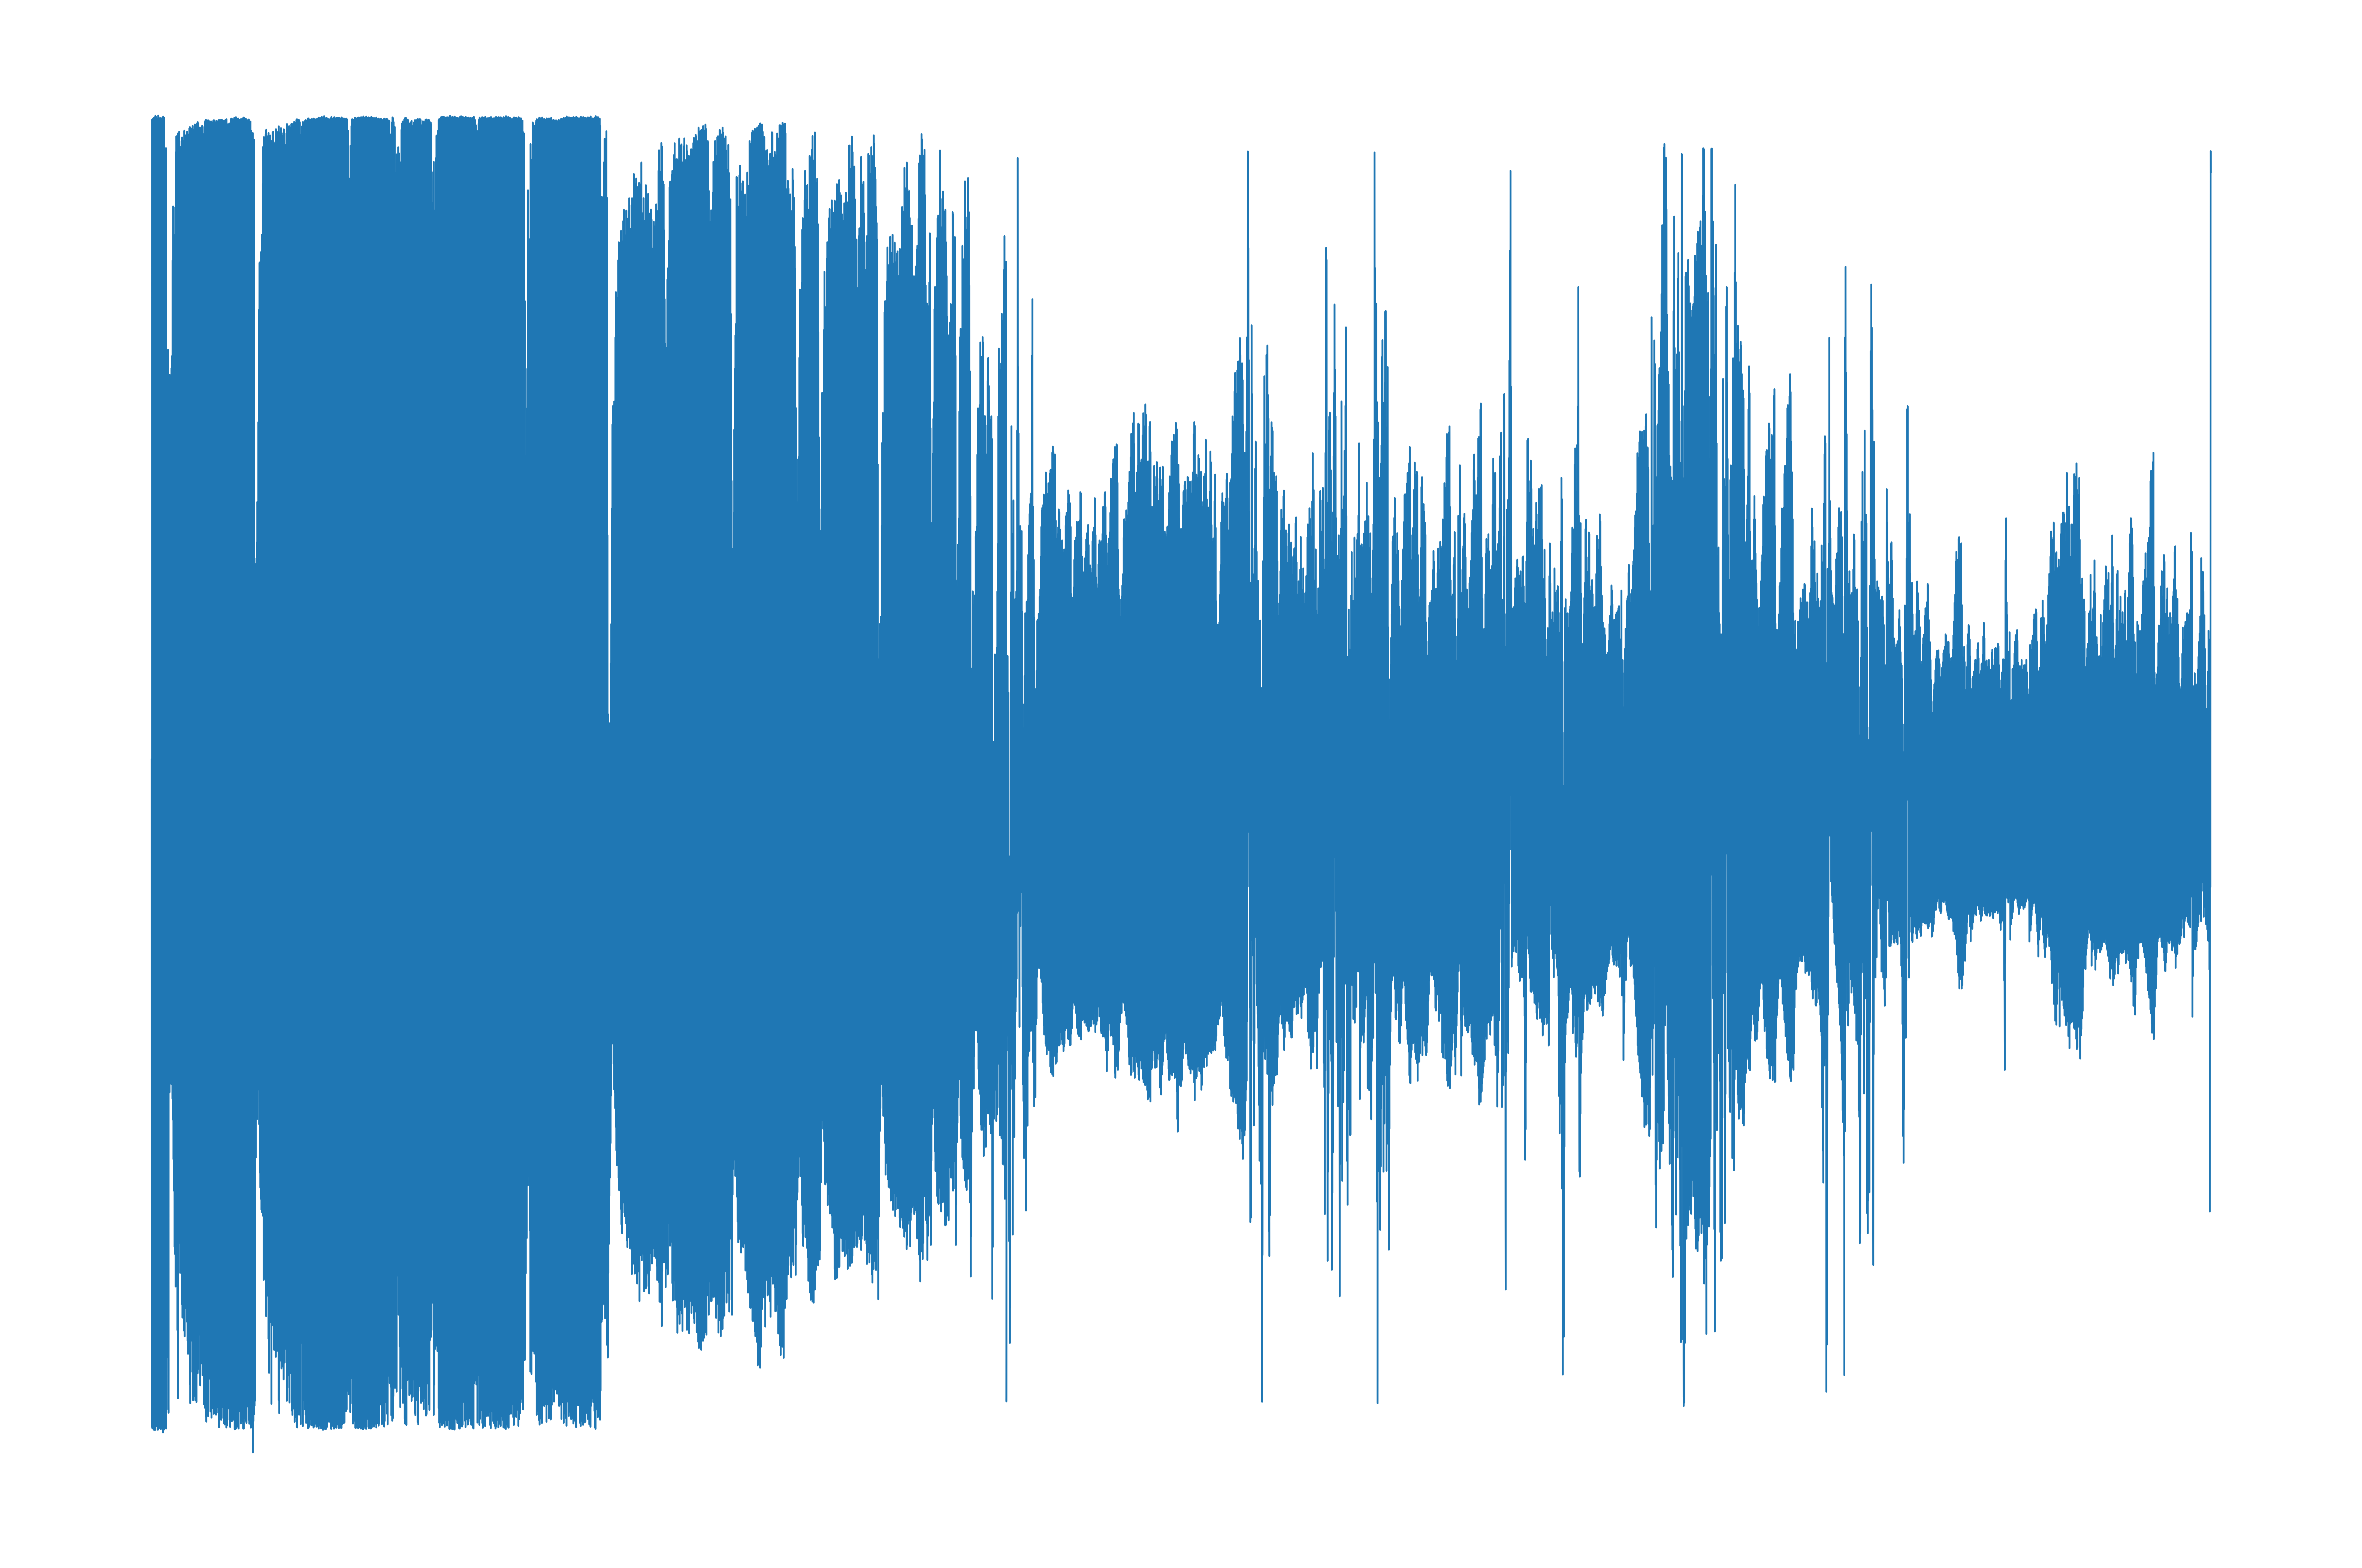

In [ ]:
plt.figure(dpi=1300)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(df_A['Signal1']), linewidth = 0.25)
plt.show()

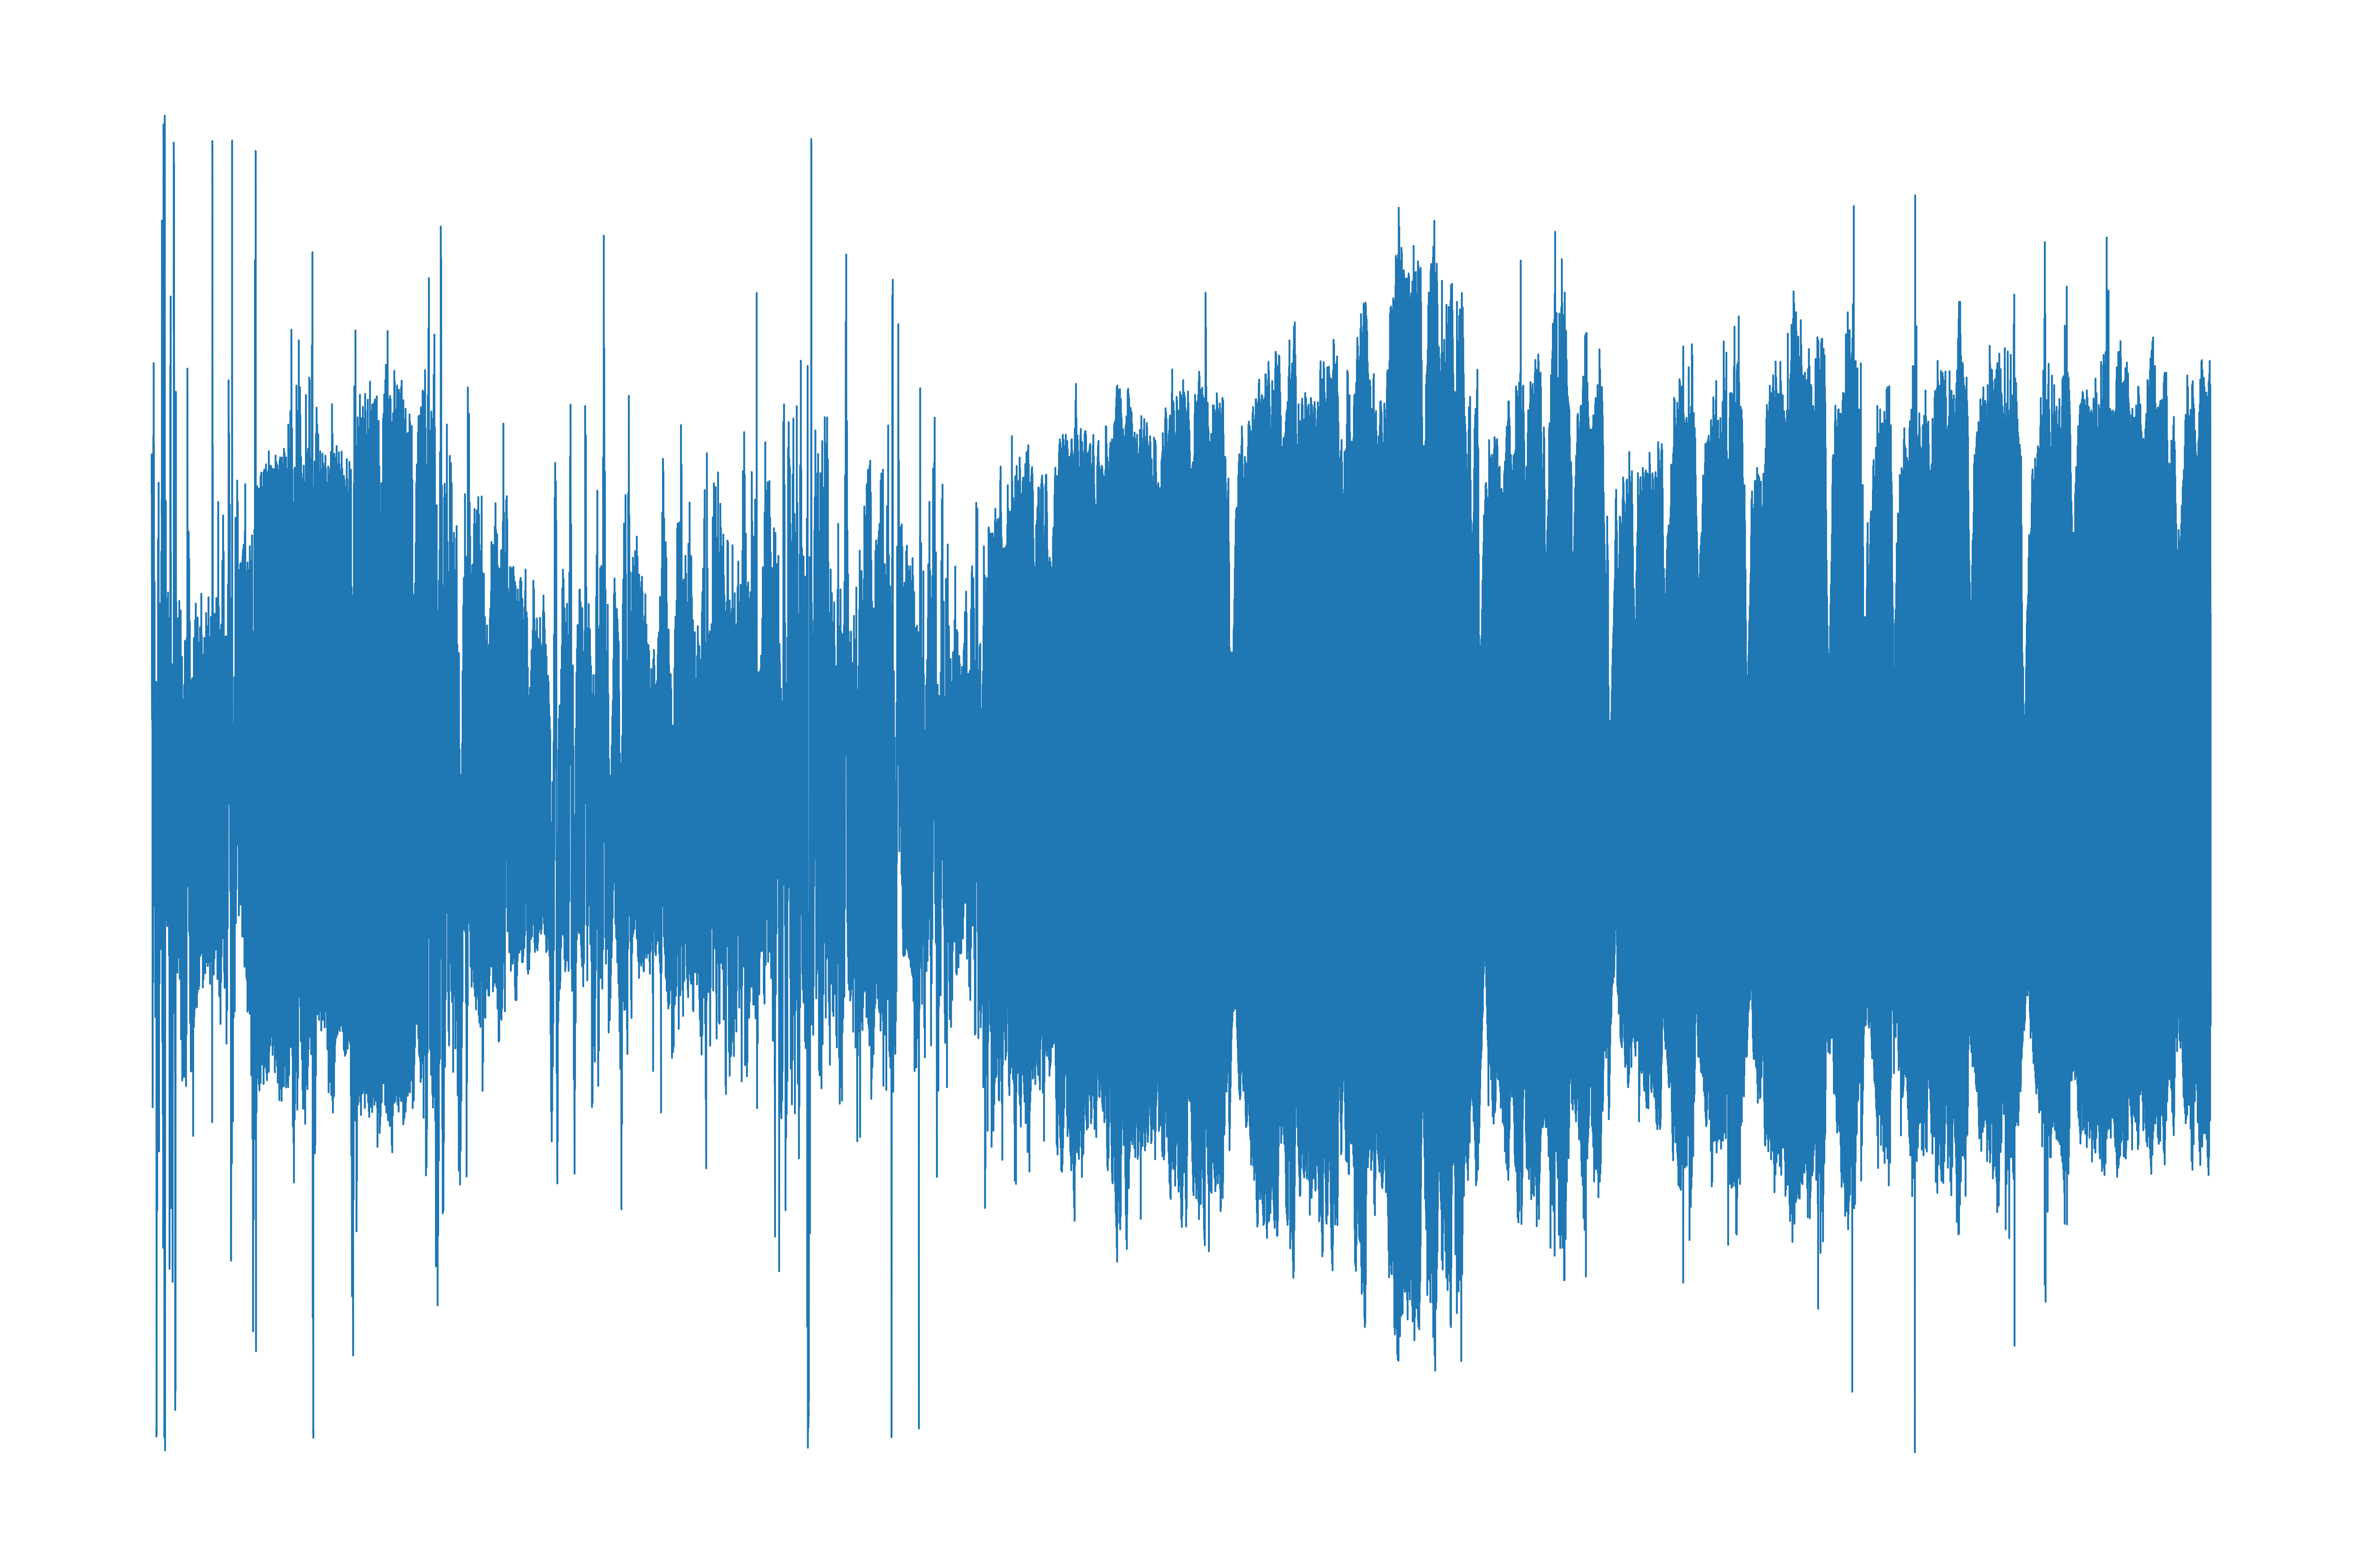

In [ ]:
plt.figure(dpi=1300)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(df_B['Signal1']), linewidth = 0.25)
plt.show()

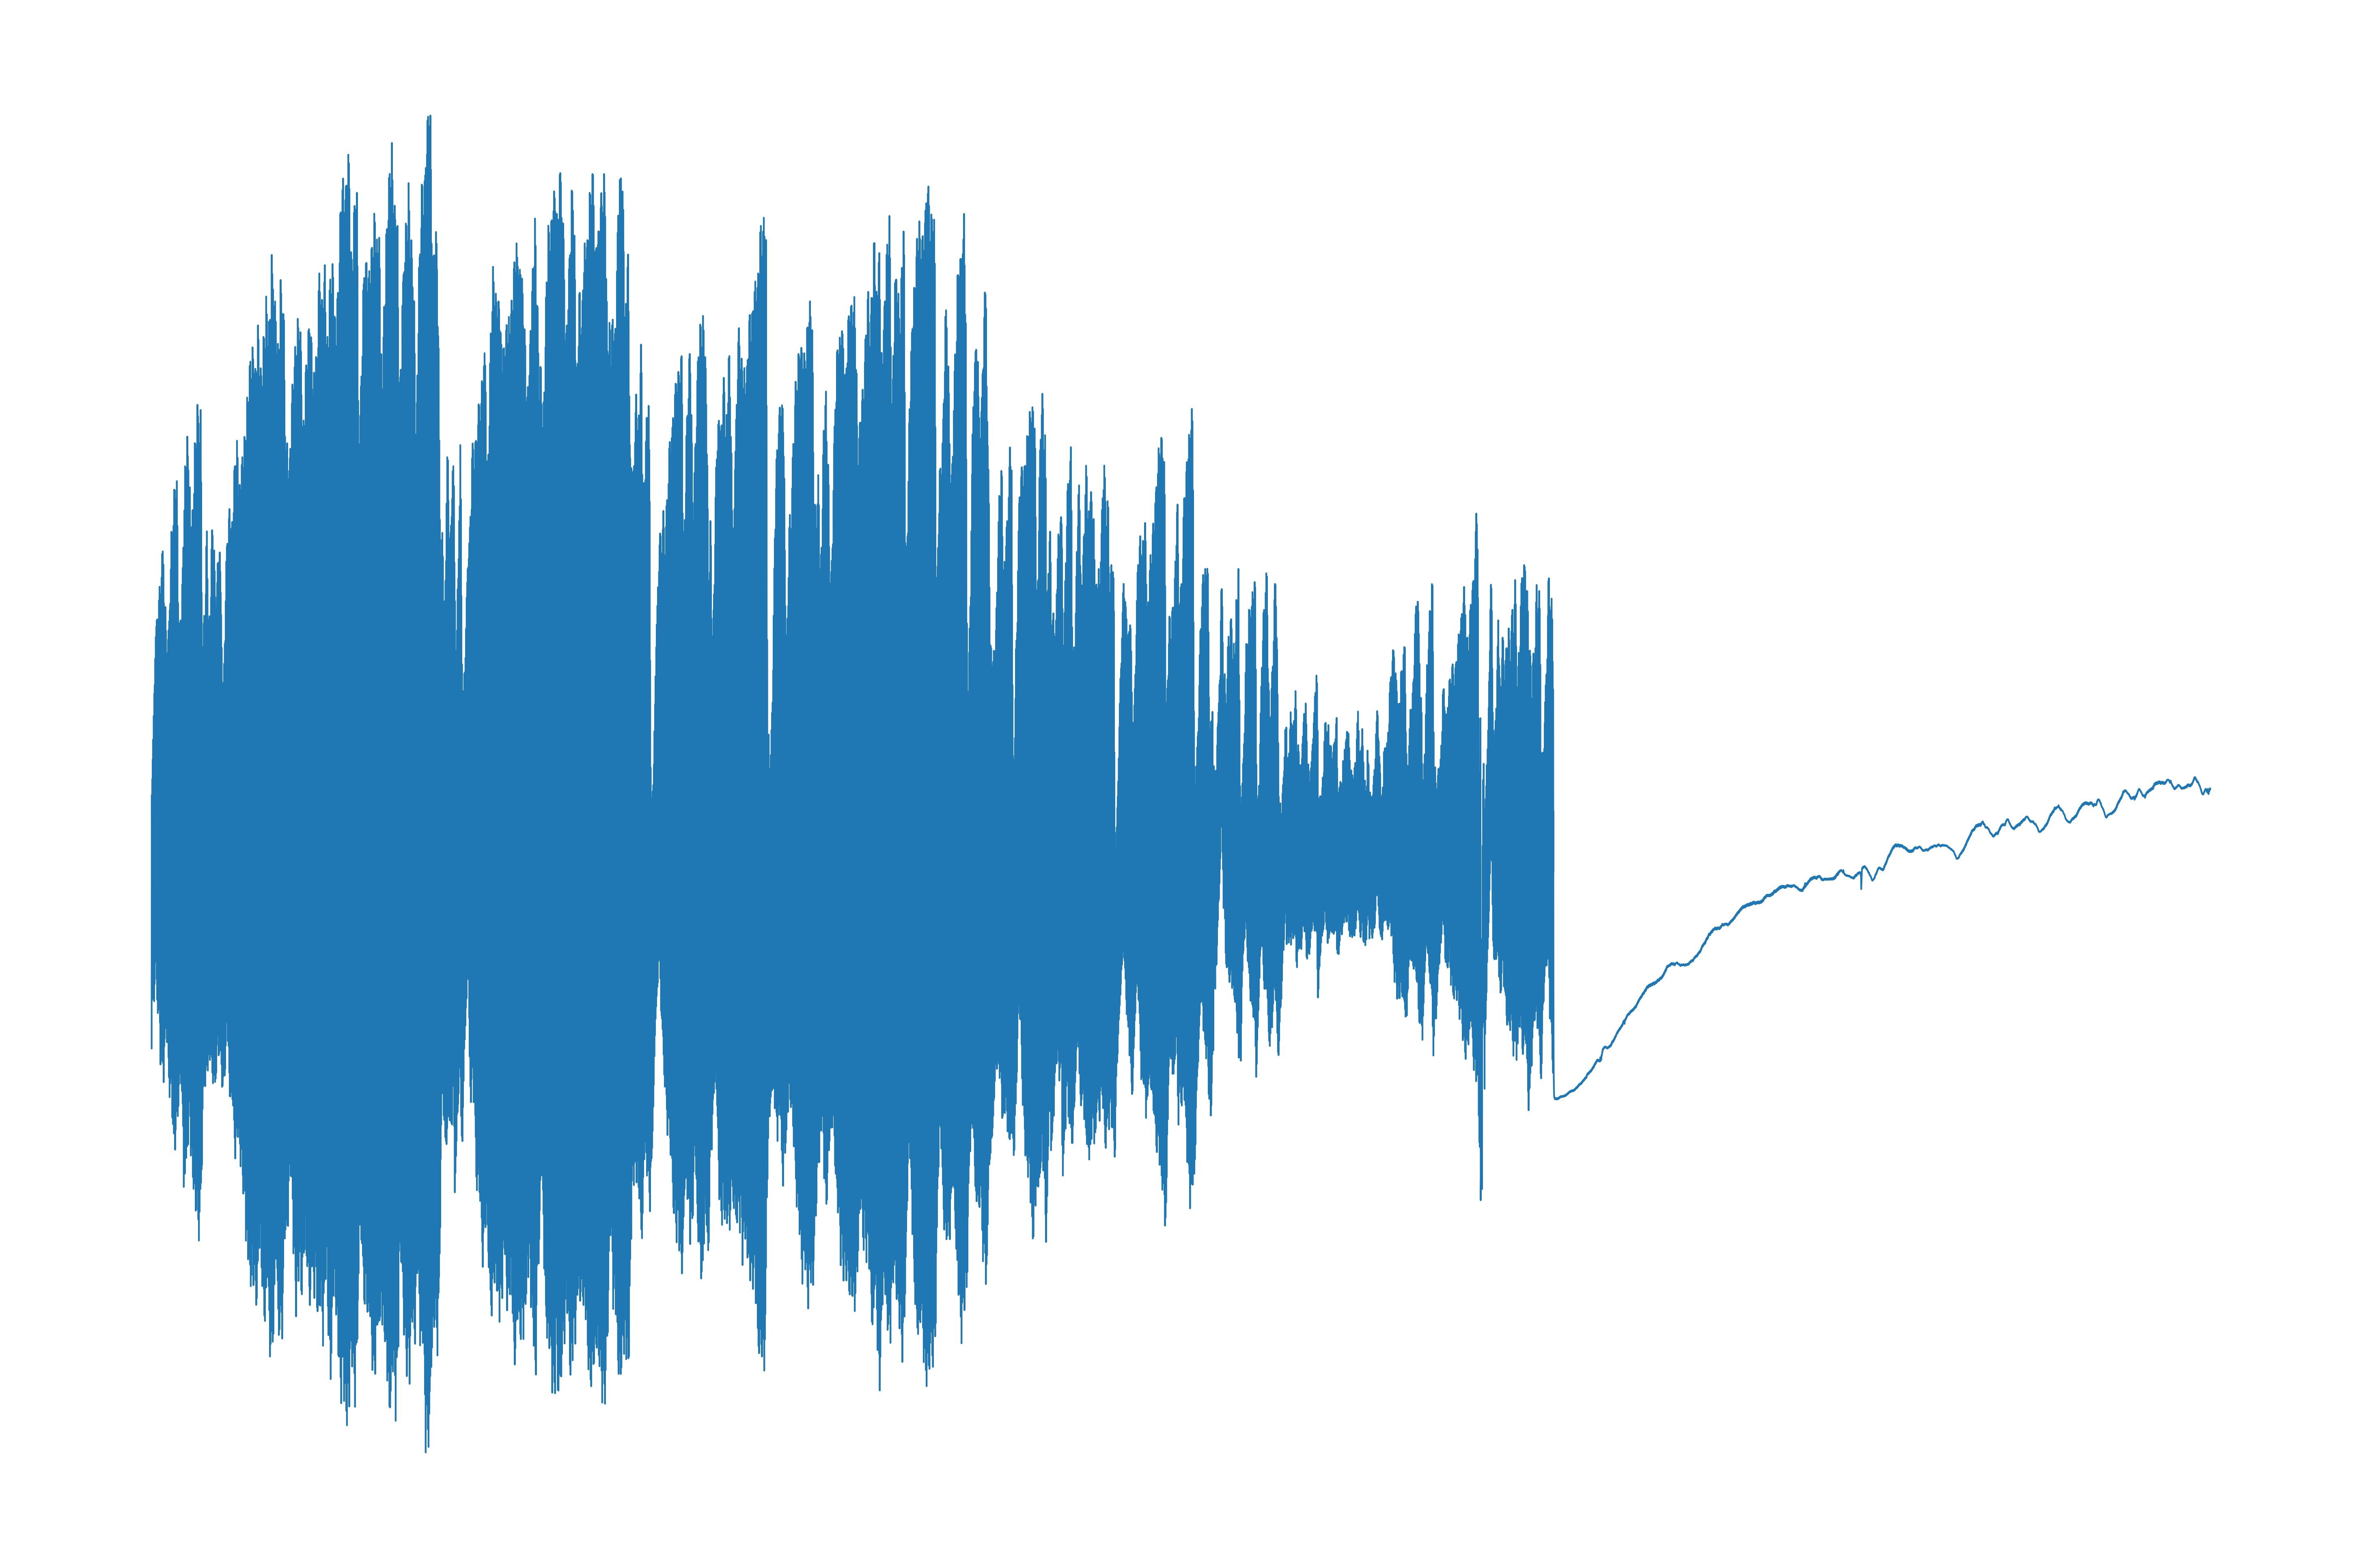

In [ ]:
plt.figure(dpi=1200)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(df_C['Signal1']), linewidth = 0.25)
plt.show()
# The end at C suggest presence of a higher order trend in C.

Hurst exponent A:0.53303

Hurst exponent B:0.52087

Hurst exponent C:0.43018 (when Scale limit was (32, 430))

we can see Labels A and B, signal 1, has successful detrending, the hurst values in the correct range, changing the scale of the DFA had pronounced effect on DFA component, I changed the Scale array multiple times, Signal 1 in label A and B had very little effect, I conclude that the DFA was successful and the classes A and B are less complex when compared to C and class C showed unsuccesful detrending in DFA and the Hurst value is out of range for signal 2, but the shape of the regression line does not do justice to the points in the graph, I read about this in an article(Wikipedia) maybe a higher order DFA(rather than fitting a linear line, we can try to fit quadratic(or cubic) function in log-log plot)

**Conclusion: Classes A and B are not as complex as Class C**

The hurst value for the label A signal 1: a look at the first 700 values, and anyone can conclude that this is a mean-reverting time series, but that would be nothing but an error, when I took into account the whole 318k+ values of the data and calculated the hurst component (0.533) it suggest that the time series is actually a brownian random motion(referred to as the drunkard's walk) that, there is no correlation in the future values of the data with the current observed one, it is equally likely for a increase or decrease in the time series.

The interpretation for label B signal 1: I expected this to have more hurst component, atleast more than A1, but its close also a part of browinian random motion, no correlation between the future value and the current observed values.
For label C and signal 1: This class and signal saw a lot of irregularities, the hurst values change rapidally with change in scale, but fitting the linear line would be an error as the curve suggests presence of higher order trend in data, it is more complex compared to class A and B.

It would have been fun to get a hurst value more than 0.5 closer to 1, to watch a real natural phenomenon in the plots. Fractal dimension came up a lot in the material I read for this assignment and so I will calculate the fractal dimension of signal 1 all labels, cause I am curious.

##**Plot Of Label A,B and C (Signal 2)**

In [ ]:
# Reference link : https://github.com/viniroger/fractal
"""
var1 = 'Signal1'
plot_data(df_A[0:7500], var1)
# It was taking longer than expected, so only 7500 values
frac = calc_Sdtau(df, var1)
D = calc_dim(frac)
print('Dimension: %s' %D)
"""
# The above is taking too long, the plot it saved explains the Hurst values for A1

"\nvar1 = 'Signal1'\nplot_data(df_A[0:7500], var1)\n# It was taking longer than expected, so only 7500 values\nfrac = calc_Sdtau(df, var1)\nD = calc_dim(frac)\nprint('Dimension: %s' %D)\n"

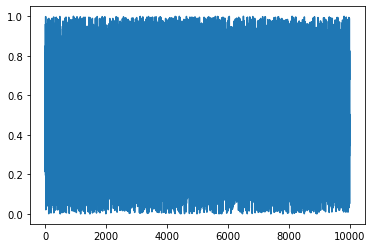

In [ ]:
np.random.seed(998)
demo = np.random.uniform(size = 10000)
sns.lineplot(data  = demo)

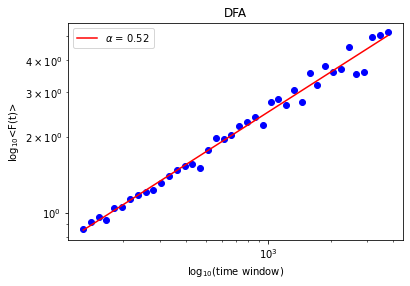

[ 0.52415498 -3.89913478]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[0.85800741 0.92093359 0.96373751 0.93276186 1.04730273 1.04948557
 1.12712629 1.17937335 1.20442894 1.22812268 1.31444109 1.39936114
 1.47869175 1.52772338 1.56194894 1.50753383 1.77402582 1.98051106
 1.95581742 2.02843464 2.19335631 2.28582427 2.39364143 2.22250992
 2.73912255 2.80927642 2.65702126 3.04511827 2.73773157 3.55264231
 3.18445856 3.79157193 3.59833195 3.70849155 4.51205565 3.52266829
 3.60741035 4.95043039 5.0566727  5.1614663 ]
DFA exponent: 0.5241549837168881


In [ ]:
scales, fluct, alpha = dfa(demo, show=1)
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

The above suggests random brownian motion, first I took 1000 values H was 0.43, 10000 value gave 0.51, 50000 gave H as 0.5009, The more data you have the better accuracy you will get, as the data is increased(50000) H tends to 0.5.

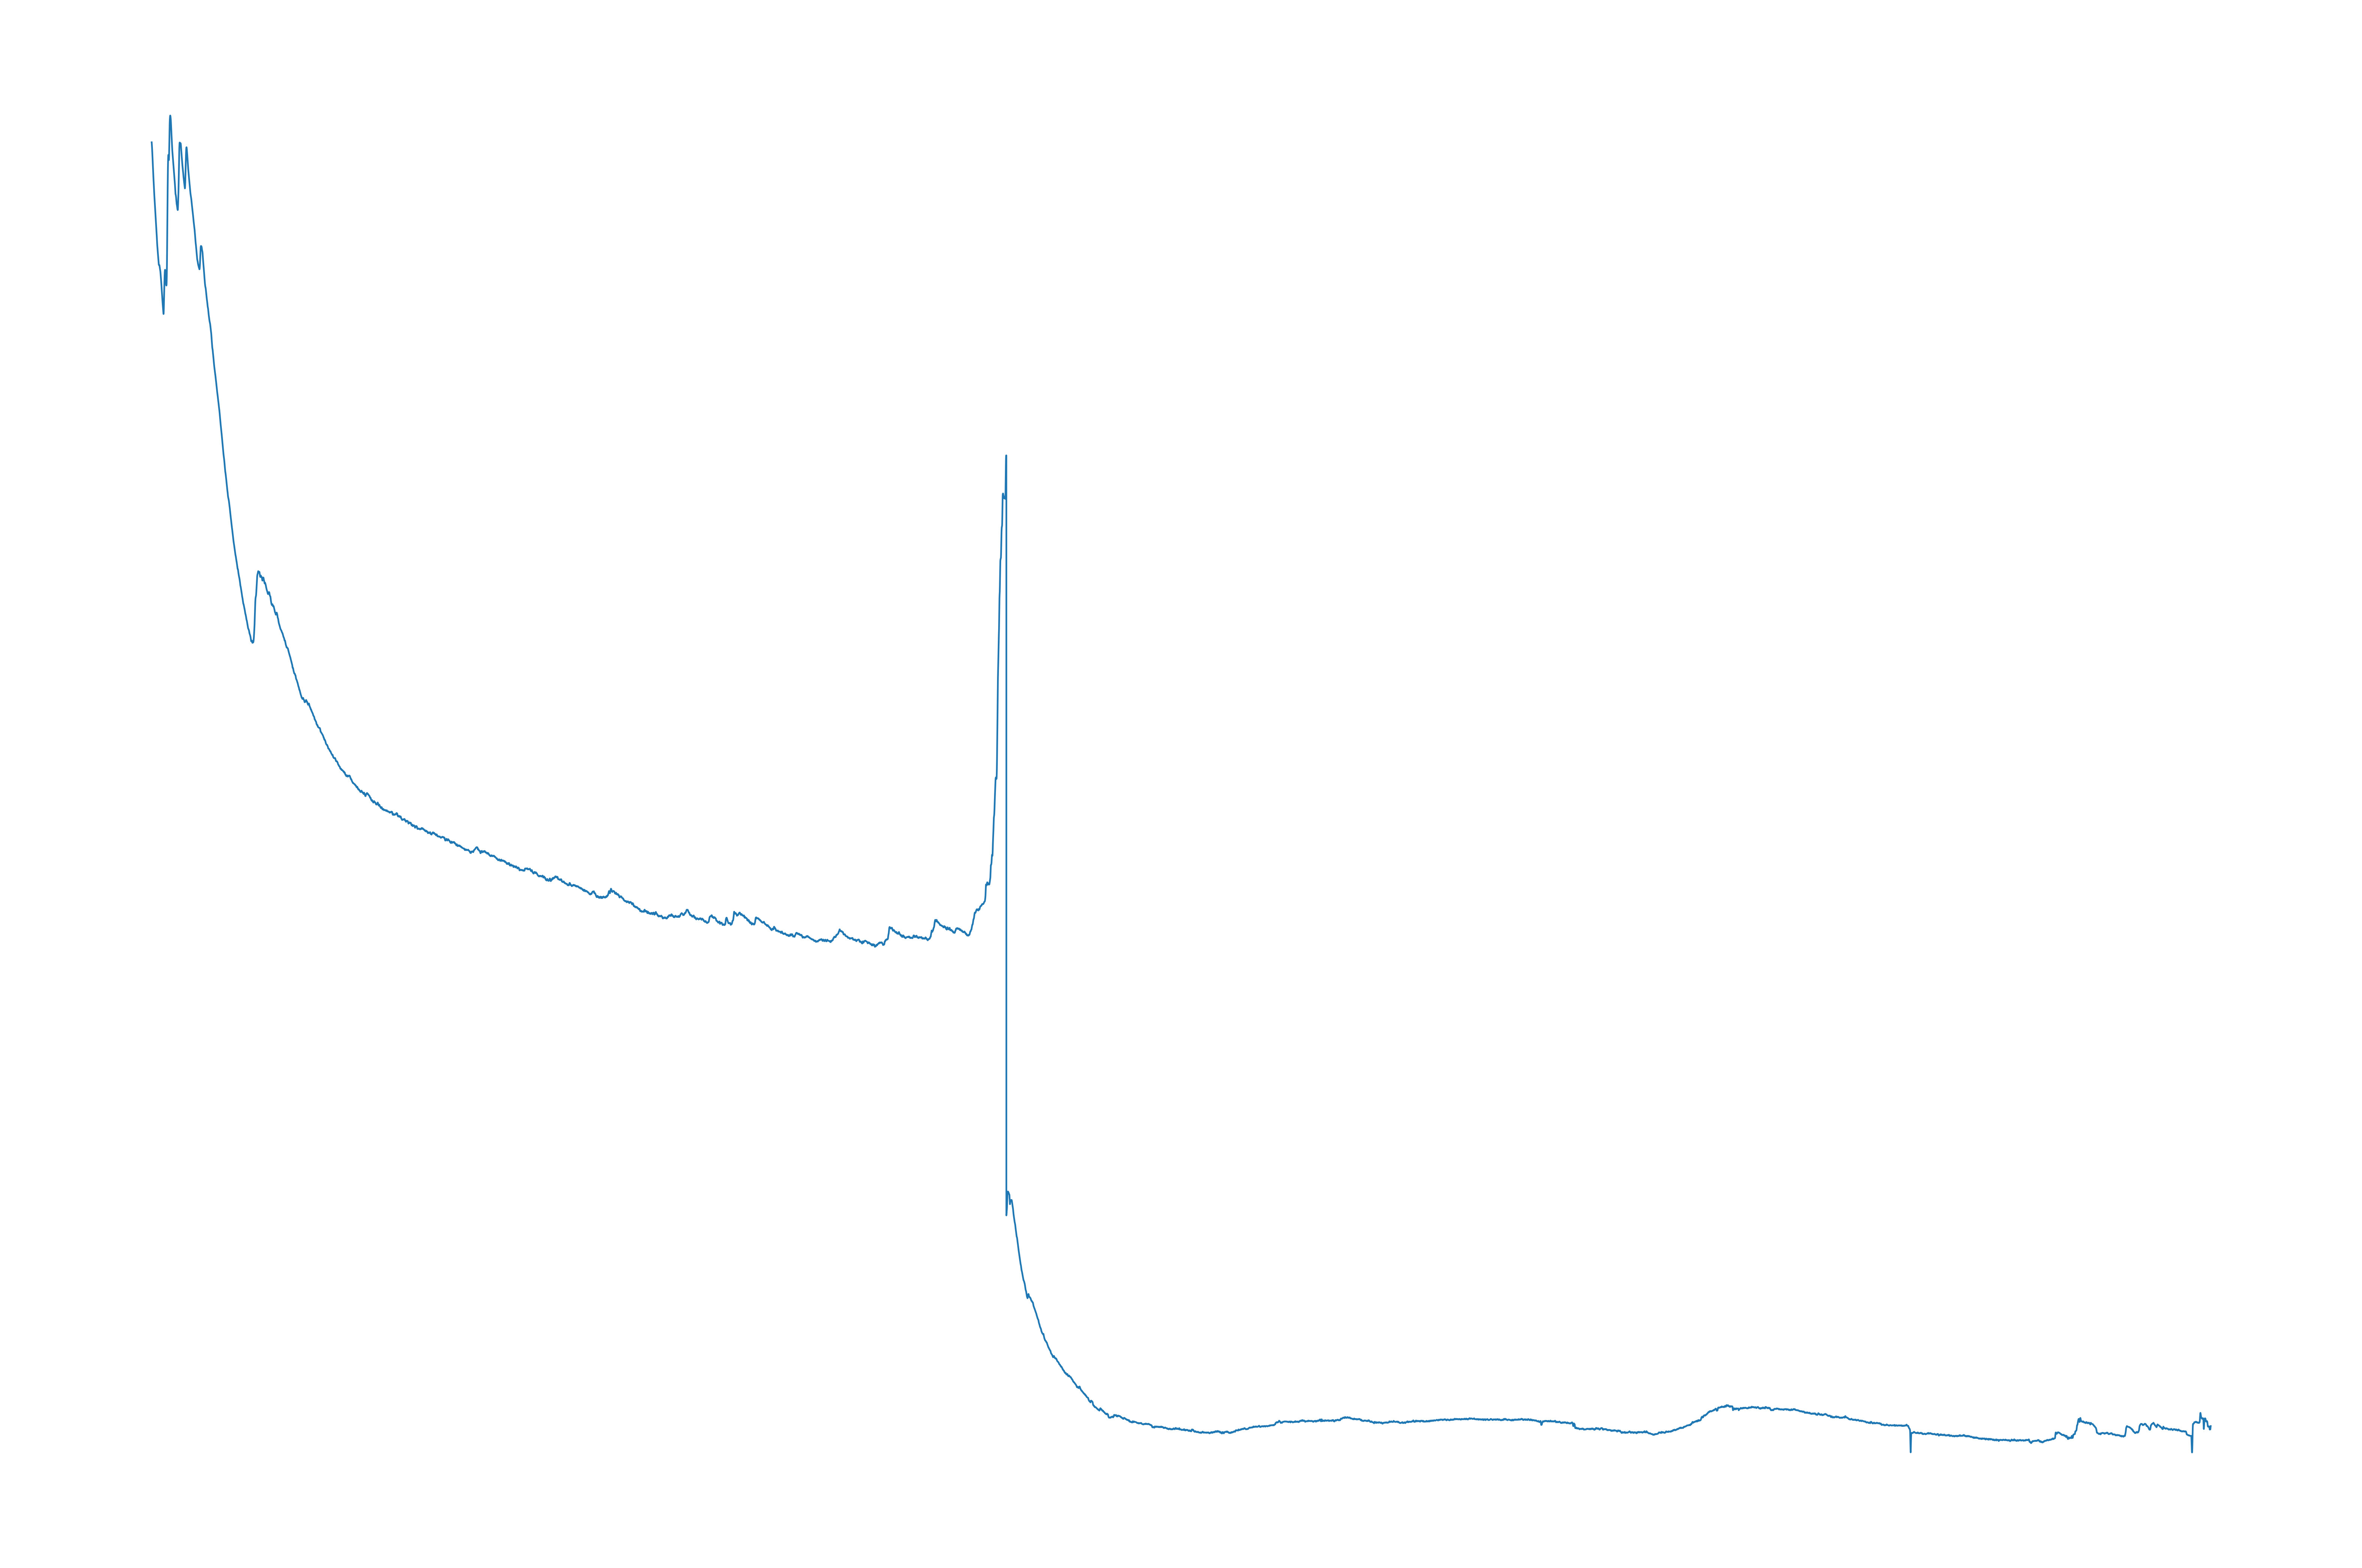

In [ ]:
plt.figure(dpi = 1300)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(df_A['Signal2']),linewidth = 0.25)
plt.savefig('A_2.png', dpi = 1300)
plt.show()

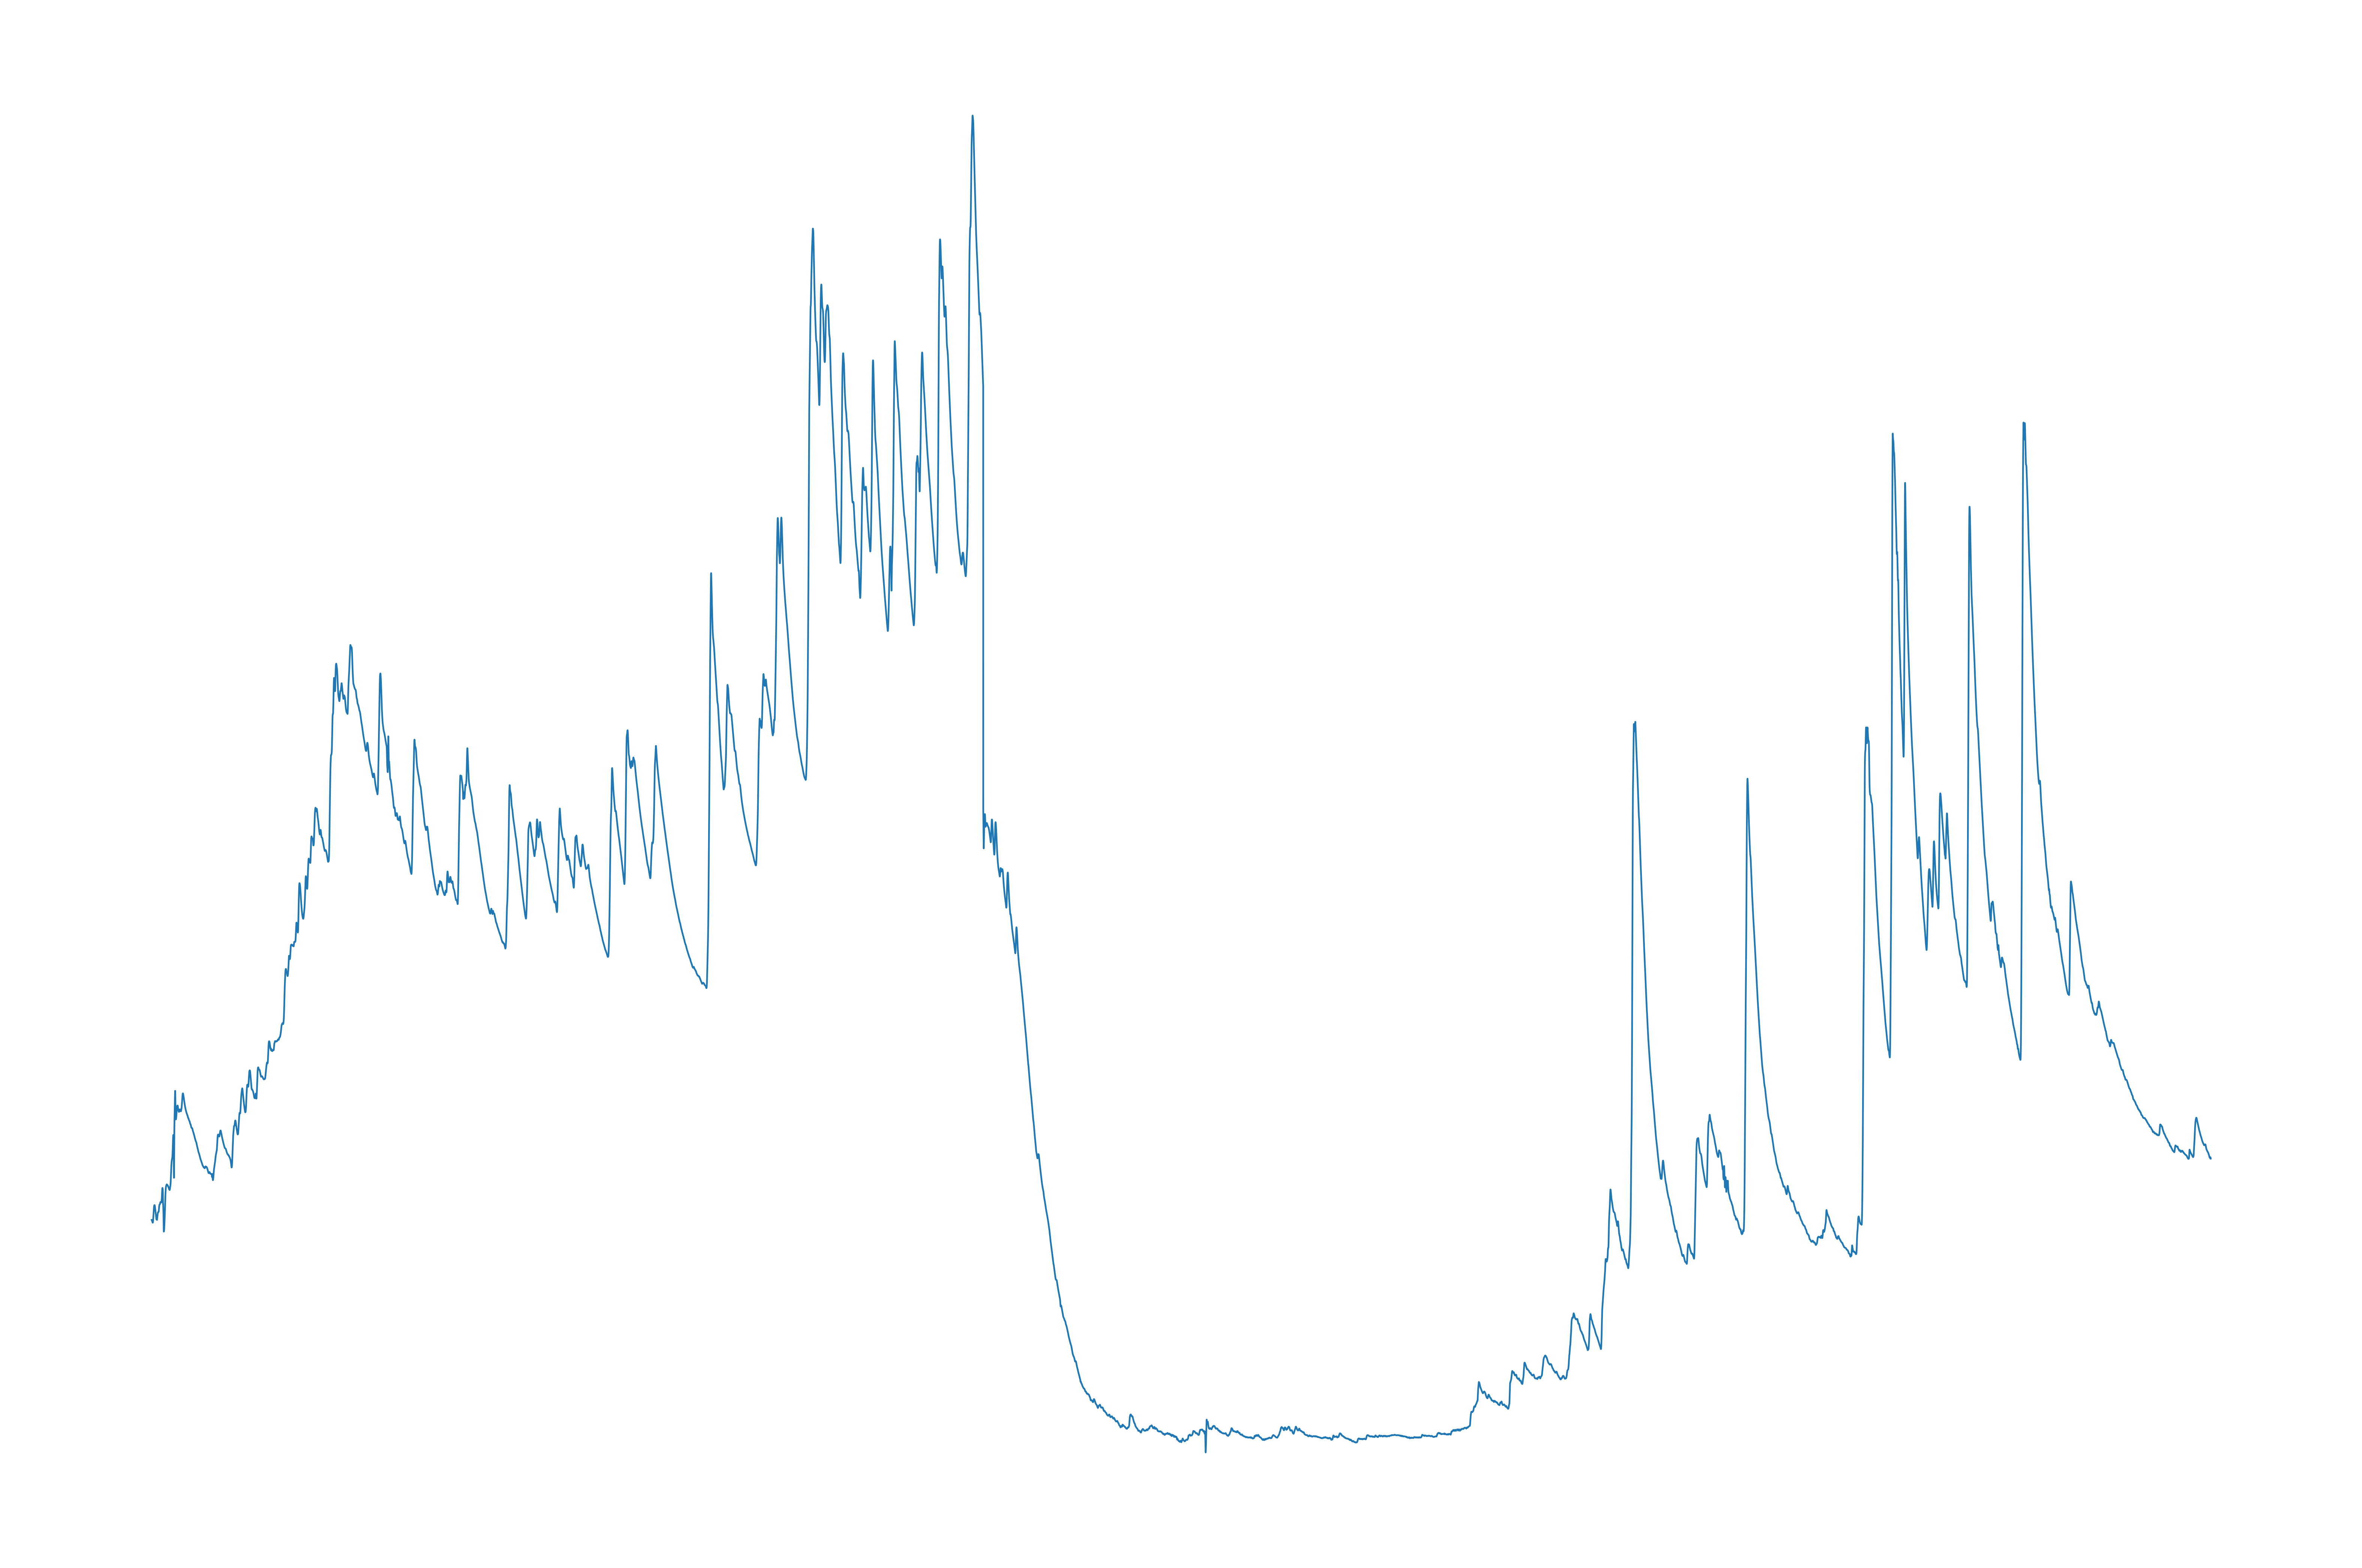

In [ ]:
plt.figure(dpi = 1300)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(df_B['Signal2']), linewidth = 0.25)
plt.savefig('B_2.png', dpi = 1300)
plt.show()

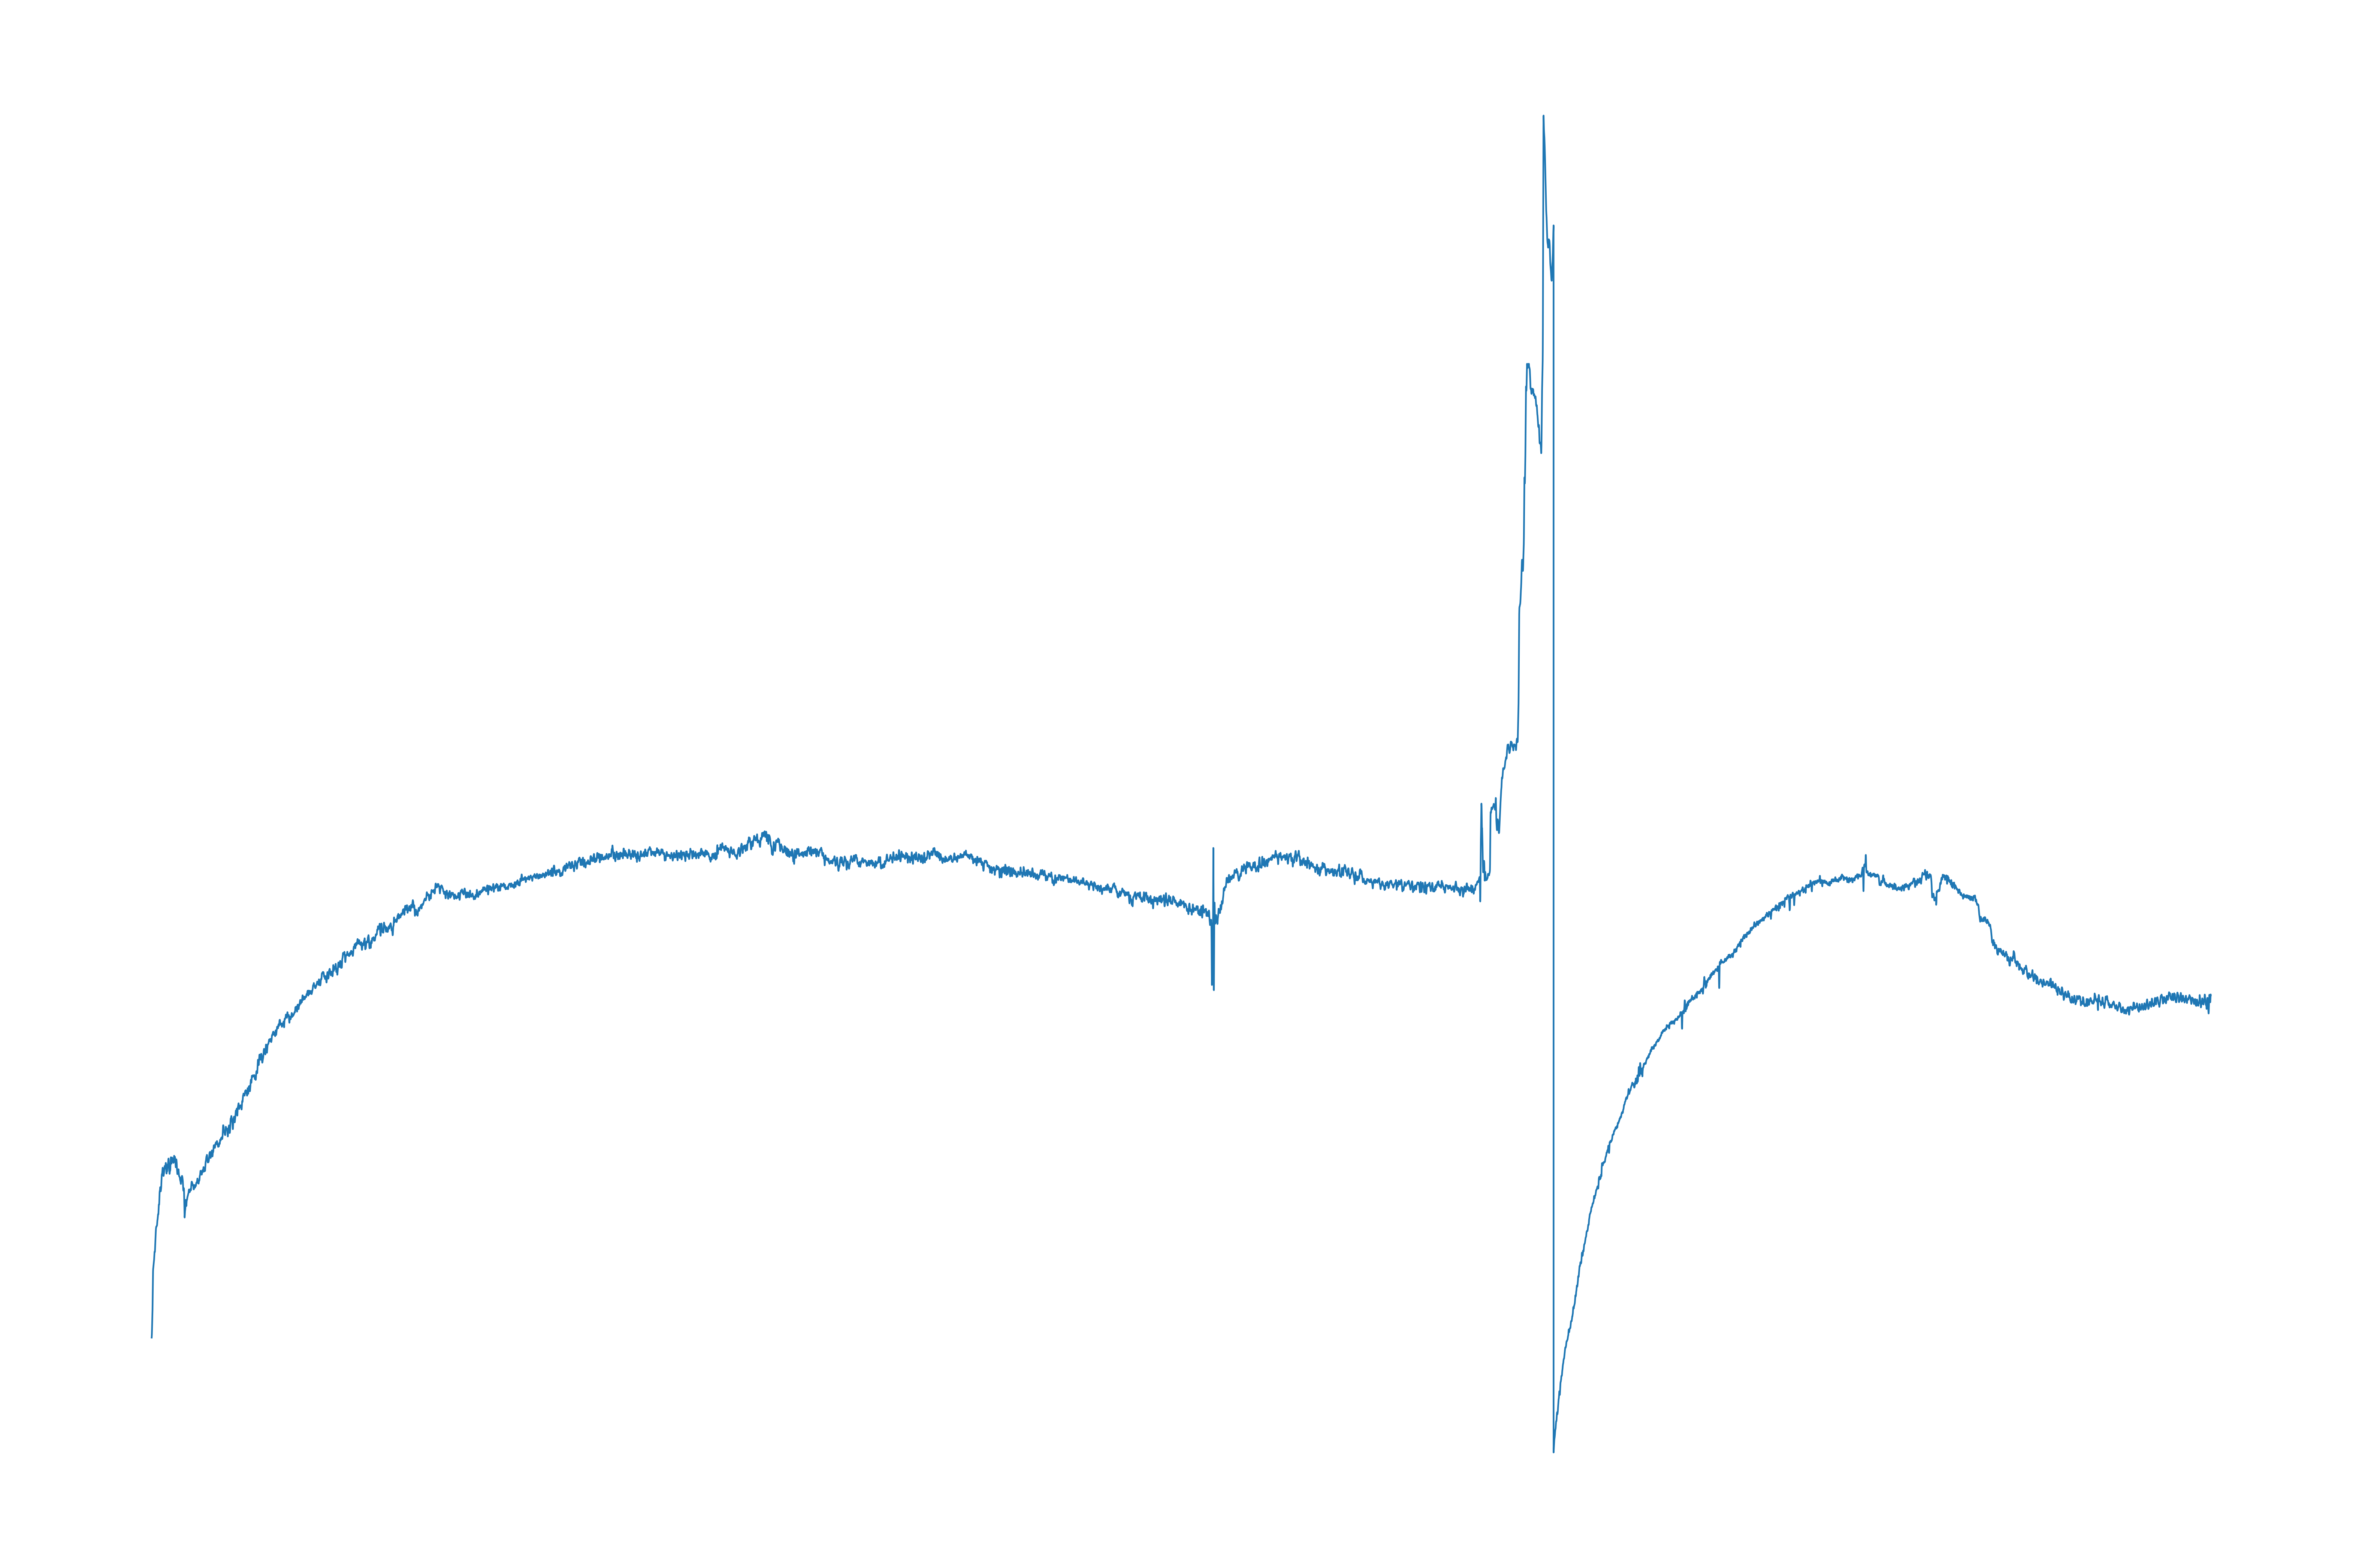

In [ ]:
plt.figure(dpi = 1300)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(df_C['Signal2']), linewidth = 0.25)
plt.savefig('C_2.png', dpi = 1300)
plt.show()

Fractal dimension

One method is to make images of the Signal 2 for all classes and scan them (imread) and calculate fractal dimension, found a lot of packages on Github that scan images to find dimension. Limitation is that Scanning the whole data set is not possible(algorithm will be very slow)

The Limitation of seaborn package are apparent, when using big data Matplotlib is actually faster, the dpi of the plots is kept high and the linewidth is kept low to capture each fluctuation with accuracy for image scanning, the images produced will be used for fractal dimension.¶

compared to signal 1, signal 2 is varying very slowly over time, so much so that the DFA is not at all suitable for signal 2

In [ ]:
# Found this code on Github
#https://github.com/ErikRZH/Fractal-Dimension/blob/master/fractal-dimension.py

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def fractal_dimension(Z, threshold=0.8):
    """Returns box-counting dimension of a 2D array.
    Args:
        Z: 2D array to be analysed.
        threshold: Cutoff for converting values in Z to 1 and 0.
    Returns:
        The estimated box counting dimension.
    """

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]


In [ ]:
#  Label A, Signal 2
I = imageio.imread("A_2.png", as_gray="True")/255.0   
# Import the image in greyscale
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

Minkowski–Bouligand dimension (computed):  1.0894084212230994


In [ ]:
#  Label B, Signal 2
I = imageio.imread("B_2.png", as_gray="True")/255.0    # Import the image in greyscale
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

Minkowski–Bouligand dimension (computed):  1.2734653424947986


In [ ]:
#  Label C, Signal 2
I = imageio.imread("C_2.png", as_gray="True")/255.0
#print(np.min(I))    # Import the image in greyscale
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

Minkowski–Bouligand dimension (computed):  1.1722506199763858


Fractal dimension for all the Labels in signal 2:

For label A, Signal 2: 1.119

For label B, Signal 2: 1.324

For label C, Signal 2: 1.194

This was expected, one look at the graph and Label B looks more fractal like compared A and C, where A and C seem to follow very smooth trends (uncharacteristic of a fractal), even the changes were not apparent until the whole curve was plotted.



In [ ]:
"""
# Trial for Label A Signal 2:
seris_A = np.array(df_A['Signal2'])
A_im = np.zeros((1000,318000))
minA = np.min(seris_A)
bound = np.max(seris_A) - minA
for i in range(318000):
    X = series_A[i] - minA
    X = X/bound
    X = int(X * 999)
    A_im[X][i] = 1
# the above should hold the whole data like I
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(A_im))
"""
# This gave a result of 0.866


'\n# Trial for Label A Signal 2:\nseris_A = np.array(df_A[\'Signal2\'])\nA_im = np.zeros((1000,318000))\nminA = np.min(seris_A)\nbound = np.max(seris_A) - minA\nfor i in range(318000):\n    X = series_A[i] - minA\n    X = X/bound\n    X = int(X * 999)\n    A_im[X][i] = 1\n# the above should hold the whole data like I\nprint("Minkowski–Bouligand dimension (computed): ", fractal_dimension(A_im))\n'

Approximate entropy - calculating entropy for a time series

Found this code on : https://gist.github.com/DustinAlandzes/a835909ffd15b9927820d175a48dee41

which is in reference to the article on : https://en.wikipedia.org/wiki/Approximate_entropy


In [ ]:
def ApEn_new(U, m, r):
    U = np.array(U)
    N = U.shape[0]
            
    def _phi(m):
        z = N - m + 1.0
        x = np.array([U[i:i+m] for i in range(int(z))])
        X = np.repeat(x[:, np.newaxis], 1, axis=2)
        C = np.sum(np.absolute(x - X).max(axis=2) <= 3, axis=0) / z
        return np.log(C).sum() / z
    
    return abs(_phi(m + 1) - _phi(m))

In [ ]:
#using the above found code to calculate entropy,
entropy = 0
"""
for i in range(30):
    entropy = entropy + (ApEn_new(np.array(df_A['Signal1'])[i*10000:(i+1)*10000], 2, 300000)) 
print(abs(entropy))
"""
print(ApEn_new(np.array(df_A['Signal1'])[0:10000], 2, 3)) 
# entropy : 0.0036
# The entropy came out to be 0.0 for the whole series Signal 1 label A.

0.003643229305668072


In [ ]:
print(ApEn_new(np.array(df_B['Signal1'])[0:10000], 2, 3)) # entropy : 0.0062

0.012539765357537647


In [ ]:
# entropy : 0 for all three
print(ApEn_new(np.array(df_A['Signal2'])[0:10000], 2, 3))
print(ApEn_new(np.array(df_B['Signal2'])[0:10000], 2, 3))
print(ApEn_new(np.array(df_C['Signal2'])[0:10000], 2, 3))

0.0
0.0
0.0


Entropy what it means

The above example is not the best way to assess, but it will roughly give a good idea of what is happening in the data, 0 entropy suggest that the time series not very random, and it may be due to the fact that Signal 2 is not changing very slowly with time and gets enropy zero, the previous values are very close to their next values. I divided the data into batch and calculated entropy for each batch and hit maximum of about 0.009(closer to 0.01)

The Project is done with the help of Gitgub and Wikipedia (Reference)etc.